In [39]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.optimizers import Adam, Adadelta, Adagrad, SGD, RMSprop

from keras.utils import np_utils
from keras.datasets import mnist

In [63]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [66]:
classes = 10
height = 28
width = 28
depth = 1
kernel_size = (3, 3)
pool_size = (2, 2)

In [68]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Figure size 432x288 with 0 Axes>

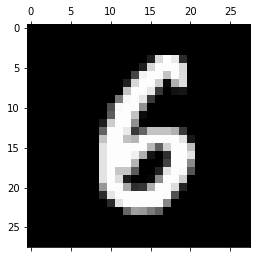

In [42]:
plt.gray()
plt.matshow(X_train[62])
plt.show()

In [43]:
print ("Train data size:", X_train.shape[0])
print ("Test data size:", X_test.shape[0])

Train data size: 60000
Test data size: 10000


In [44]:
X_train = X_train.reshape((X_train.shape[0], height, width, depth))
X_test = X_test.reshape((X_test.shape[0], height, width, depth))

In [45]:
# Data normalization

X_train = X_train/ 255.0
X_test = X_test / 255.0

In [46]:
y_train = np_utils.to_categorical(y_train, classes)
y_test = np_utils.to_categorical(y_test, classes)


In [ ]:
class VGG():
    
    @staticmethod
    def build(width, height, depth, classes):
        
        model = Sequential()
    
        # Block1
        model.add(Convolution2D(64, kernel_size= kernel_size, activation = 'relu', padding = 'same', input_shape=(height, width, depth)))
        model.add(Convolution2D(64, kernel_size= kernel_size, activation = 'relu', padding = 'same'))
        model.add(MaxPooling2D(pool_size= pool_size, strides=(2, 2)))
        
        # Block2
        
        model.add(Convolution2D(128, kernel_size= kernel_size, activation = 'relu', padding = 'same'))
        model.add(Convolution2D(128, kernel_size= kernel_size, activation = 'relu', padding = 'same'))
        model.add(Convolution2D(128, kernel_size= kernel_size, activation = 'relu', padding = 'same'))
        model.add(MaxPooling2D(pool_size = pool_size, strides = (2, 2)))
        
        # Block3
        model.add(Convolution2D(256, kernel_size = kernel_size, activation = 'relu', padding = 'same'))
        model.add(Convolution2D(256, kernel_size = kernel_size, activation = 'relu', padding = 'same')) 
        model.add(Convolution2D(256, kernel_size = kernel_size, activation = 'relu', padding = 'same')) 
        model.add(MaxPooling2D(pool_size = pool_size, strides = (2, 2)))
        
        # BLock4
        #model.add(Convolution2D(512, kernel_size = kernel_size, activation = 'relu', padding = 'same'))
        #model.add(Convolution2D(512, kernel_size = kernel_size, activation = 'relu', padding = 'same'))
        #model.add(Convolution2D(512, kernel_size = kernel_size, activation = 'relu', padding = 'same'))
        #model.add(MaxPooling2D( pool_size = pool_size, strides = (2, 2 )))  
                  
        # Flatten layer 
                  
        model.add(Flatten())
        model.add(Dense(4096, activation = 'relu'))
        model.add(Dense(4096, activation = 'relu'))
        model.add(Dense(classes, activation = 'softmax'))
        return model
        
                  
                  
                    
                
                  
                  

In [59]:
model = VGG.build(width = width, height = height, depth = depth, classes = classes)
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 128)       

In [60]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.fit(X_train[0: 2000], y_train[0: 2000], batch_size= 128, epochs=20,  verbose= 1, validation_data= (X_test[0:400], y_test[0:400]))

Train on 2000 samples, validate on 400 samples
Epoch 1/20
2000/2000 [==============================] - 73s 37ms/step - loss: 2.3025 - accuracy: 0.1055 - val_loss: 2.2946 - val_accuracy: 0.1025
Epoch 2/20
2000/2000 [==============================] - 74s 37ms/step - loss: 2.3020 - accuracy: 0.1120 - val_loss: 2.2944 - val_accuracy: 0.1025
Epoch 3/20
2000/2000 [==============================] - 69s 34ms/step - loss: 2.2991 - accuracy: 0.1270 - val_loss: 2.2916 - val_accuracy: 0.2300
Epoch 4/20
2000/2000 [==============================] - 71s 36ms/step - loss: 2.2875 - accuracy: 0.1680 - val_loss: 2.2485 - val_accuracy: 0.2375
Epoch 5/20
2000/2000 [==============================] - 69s 35ms/step - loss: 2.3173 - accuracy: 0.1485 - val_loss: 2.2953 - val_accuracy: 0.1425
Epoch 6/20
2000/2000 [==============================] - 68s 34ms/step - loss: 2.3049 - accuracy: 0.0995 - val_loss: 2.2967 - val_accuracy: 0.1150
Epoch 7/20
2000/2000 [==============================] - 70s 35ms/step - loss:

In [ ]:
# http://euler.stat.yale.edu/~tba3/stat665/lectures/lec18/notebook18.html

In [62]:
from keras.applications.vgg16 import VGG16

mod = VGG16()

553467904/553467096 [==============================] - 636s 1us/step


In [64]:
!pip install python-resize-image

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [79]:
from PIL import Image as pil_image
from resizeimage import resizeimage
import cv2

print (type(X_train))
img = cv2.resize(X_train[1], dsize=(224, 224), interpolation=cv2.INTER_CUBIC)


dataimg = np.float64(np.array(img))
dataimg = np.reshape(dataimg,(1,224,224,3))
#print (res)

plt.gray()
plt.matshow(res)
plt.show()
#img = resizeimage.resize_cover(X_train[0], [224, 224])


<class 'numpy.ndarray'>


ValueError: cannot reshape array of size 50176 into shape (1,224,224,3)

In [71]:
X_train[0].shape

(28, 28)